Contents:
1. <a href=#data_dir>Set working dir and Clone from git hub(for first time)</a><br>
2. <a href=#data_pipeline>Data Pipeline</a><br>
3. <a href=#train>Train</a><br>
4. <a href=#results>Results</a>
5. <a href=#viz_differences>Visualizing Prediction differences at different softmaxes</a><br>
6. <a href=#viz_good_bad>Visualizing highly confidenct correct and incorrect predictions</a><br>


In [2]:
import numpy as np

import tensorflow as tf

import numpy as np
import time, math
from tqdm import tqdm_notebook as tqdm


import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



<a name=data_dir></a>

# Data Directory Set Up. 
Clone from git if running for first time. Else git pull

In [3]:
import os
os.getcwd()
from google.colab import drive
import os
drive.mount('/content/gdrive')

#IF YOU ARE CLONING FOR THE FIRST TIME in colab please uncomment all the below 5 lines of code. 
#Put git user name and password in appropriate places

#root_path = 'gdrive/My Drive/Colab Notebooks/' #change dir to folder where you want to clone
#os.chdir('/content/' + root_path)
#!git clone https://<UR_GIT_USERNAME>:<GIT_PASSWORD>@github.com/selfishhari/eva_research_team4.git
#!git branch -r | grep -v '\->' | while read remote; do git branch --track "${remote#origin/}" "$remote"; done
#!git checkout zeedense


root_path = 'gdrive/My Drive/Colab Notebooks/eva_research_team4/src/' #change dir to your project folder's src

os.chdir('/content/' + root_path)
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks/eva_research_team4/src'

In [4]:
!git branch
#YOU NEED TO BE ON "zeedense" branch

  augmentation
  densenext
  development
  master
  tfrecords_fix
* zeedense


In [5]:
!git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 7 (delta 6), reused 7 (delta 6), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/selfishhari/eva_research_team4
   db4f3cc..16dcea1  zeedense   -> origin/zeedense
Updating db4f3cc..16dcea1
Fast-forward
 src/run_util.py        | 37 +++++++++++++++++++++++++-
 src/test_run_script.py | 10 ++++---
 src/visual_utils.py    | 71 ++++++++++++++++++++++++++++++++++++++------------
 src/zeedensenet.py     |  2 +-
 4 files changed, 97 insertions(+), 23 deletions(-)


In [6]:
#from all_models import DavidNet


import run_util


from importlib import reload
reload(run_util)

from run_util import Run

import data_pipeline

reload(data_pipeline)

from zeedensenet import ZeeDenseNet

Using TensorFlow backend.






32 conv0.9691892682402613 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.9691892682402613 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.9691892682402613 (3, 3) (1, 1) same (1, 1) None glorot_uniform


<a name=data_pipeline></a>

# Data Pipeline

In [0]:
data_pipeline.get_data(dataset_name = "CIFAR10", tfrecords_flag=True)

######

In [0]:
train_mean = np.array([125.30691805, 122.95039414, 113.86538318])

train_std= np.array([62.99321928, 62.08870764, 66.70489964])

normalize = lambda x: ((x - train_mean) / train_std)

def data_aug_train(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    paddings = [(4, 4), (4, 4), (0, 0)]
    
    x = tf.pad(x, paddings, "REFLECT")
    
    x = tf.random_crop(x, [32, 32, 3])
    
    return (x, y)
  
def data_aug_test(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    #paddings = [(4, 4), (4, 4), (0, 0)]
    
    #x = tf.pad(x, paddings, "REFLECT")
    
    #x = tf.random_crop(x, [32, 32, 3])
    
    return (x, y)

<a name=train></a>

# Train

In [0]:
obj = Run()

In [0]:
BATCH_SIZE = 512 #@param {type:"integer"}
MOMENTUM = 0.95 #@param {type:"number"}

MIN_MOMENTUM = 0.8 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS = 24 #@param {type:"integer"}


MIN_LEARNING_RATE = 0.000001 #@param {type:"number"}

END_LR_SMOOTHING_PERC = 0.15 #@param {type:"number"}

COMMENTS = "Zeedensenet multisoftmax, gap on channels, multi_inference df" #@param {type:"string"}


params_tune = {
    
  "epochs":EPOCHS, 
 
  "batch_size" : BATCH_SIZE,

  "max_lr": LEARNING_RATE,

  "min_lr":MIN_LEARNING_RATE,

  "end_anneal_pc":END_LR_SMOOTHING_PERC,

  "max_mom":MOMENTUM,
 
  "min_mom":MIN_MOMENTUM,
 
  "wd":WEIGHT_DECAY,
  
  "skip_testing_epochs":0,
    
  "batches_per_epoch":50000//BATCH_SIZE,
    
  "comments":COMMENTS
}

In [0]:
loaded_tfrecs = data_pipeline.load_tfrecords(params_tune["batch_size"])

train_dataset = loaded_tfrecs["train"]

eval_dataset = loaded_tfrecs["eval"]

In [0]:
def tst_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
    
    global eval_dataset
  
    len_test = 10000

    test_set = eval_dataset.map(data_aug_test).batch(batch_size).prefetch(1)
    
    return (test_set, len_test)

def trn_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
  
    global train_dataset
    
    len_train = 50000

    train_set = train_dataset.map(data_aug_train).batch(batch_size).prefetch(1)
    
    return (train_set, len_train)

In [12]:
#import cProfile
model2 = ZeeDenseNet(f_filter=16,  
                     dimensions_dict= {"dimensions_to_sample":(8,8)}, 
                     gap_mode="x_axis",
                     layers_filters={0:64, 1:128},
                    multisoft_list = [0, 1, 2],
                     roots_flag=False
                    )
x = obj.run(params_tune, trn_data_supplier, tst_data_supplier, model = model2)

16 0.8128901909991317conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 0.937045551516321conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 0.6480686543942945conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 0.6654504597583136conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
64 0.13178576412686172conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
64 0.935681337081559conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
64 0.4689995434450972conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.8357697302012895conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.4284920380722097conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 0.2784339510028203conv (3, 3) (1, 1) same (1, 1) None glorot_uniform
64 0.6797850876257412conv (3, 3) (1, 1) same (2, 2) None glorot_uniform
128 0.019234428871112708conv (3, 3) (1, 1) same (2, 2) None glorot_uniform



epoch: 1 lr: 0.08 train loss: 3.089 train acc:0.332 val loss: 2.522 val acc: 0.459 time:150.303
epoch: 2 lr: 0.16 train loss: 2.126 train acc:0.566 val loss: 2.040 val acc: 0.582 time:285.391
epoch: 3 lr: 0.24 train loss: 1.702 train acc:0.659 val loss: 2.083 val acc: 0.579 time:423.762
epoch: 4 lr: 0.32 train loss: 1.425 train acc:0.721 val loss: 1.622 val acc: 0.686 time:560.283
epoch: 5 lr: 0.4 train loss: 1.247 train acc:0.761 val loss: 1.536 val acc: 0.721 time:695.653
epoch: 6 lr: 0.376 train loss: 1.084 train acc:0.797 val loss: 1.425 val acc: 0.731 time:833.230
epoch: 7 lr: 0.35200000000000004 train loss: 0.960 train acc:0.827 val loss: 1.212 val acc: 0.774 time:969.912
epoch: 8 lr: 0.328 train loss: 0.883 train acc:0.843 val loss: 1.394 val acc: 0.738 time:1107.090
epoch: 9 lr: 0.30400000000000005 train loss: 0.811 train acc:0.860 val loss: 1.101 val acc: 0.799 time:1243.261
epoch: 10 lr: 0.28 train loss: 0.755 train acc:0.872 val loss: 1.122 val acc: 0.792 time:1380.681
epoc

<a name=results></a>

# Results

In [13]:
run_util.early_inference_accuracy(obj.model,test_dataset = tst_data_supplier)

sm_level  accuracy      loss  inference_time
0      sm1    0.6956  0.000113        0.878224
1      sm2    0.8424  0.000318        0.461386
2      sm3    0.8728  0.000816        0.440198

In [0]:
import visual_utils
reload(visual_utils)
#diff_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier)

all_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier, difference=False)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
diff_df = all_df

diff_df["subset_diff"] = False

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm1_correct != diff_df.sm3_correct)

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm2_correct != diff_df.sm3_correct)

diff_df = diff_df.loc[diff_df.subset_diff==True,:].copy()

In [44]:
all_df.head(3)

ys  subset  ...  subset_diff  mode
0   7    True  ...         True     7
1   2    True  ...         True     2
2   0    True  ...        False     0

[3 rows x 14 columns]

Final confusion matrix-at softmax3


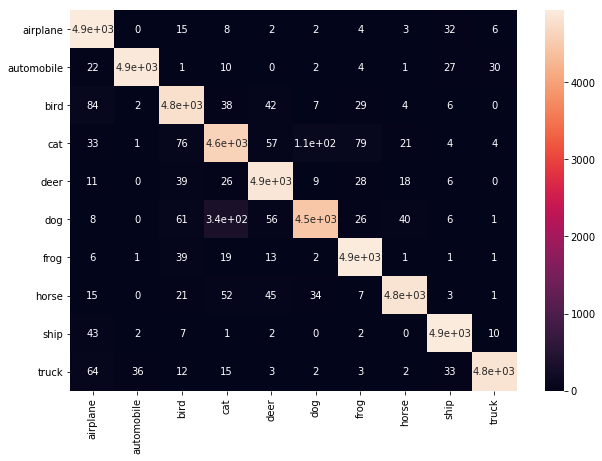

In [36]:
print("Final confusion matrix-at softmax3")
visual_utils.plot_cm(all_df.ys, all_df.sm3_class)

Confusion matrix-at softmax1


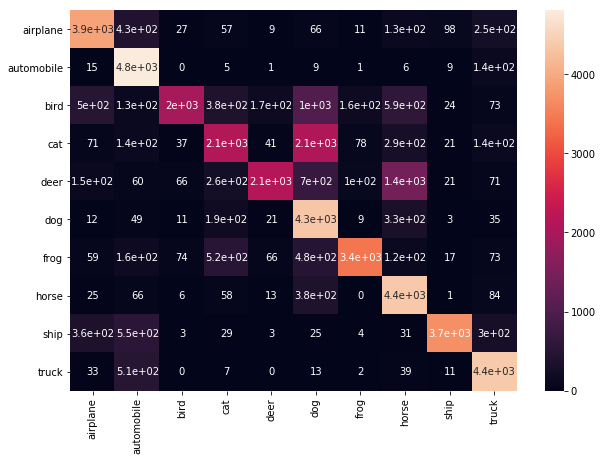

In [35]:
print("Confusion matrix-at softmax1")
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

Confusion matrix-at softmax2


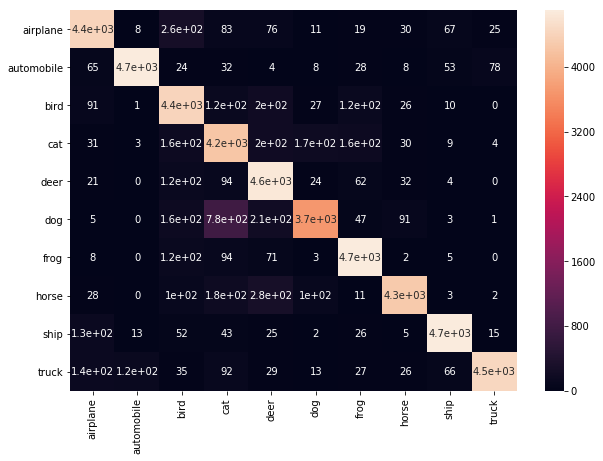

In [34]:
print("Confusion matrix-at softmax2")
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

**Voting accuracy**

In [42]:
print("Accuracy calculated by voting results from 3 softmaxes.\n \
Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken\n")
run_util.voting_accuracy(df=all_df, true_col="ys", sm_class_colnames = ["sm1_class", "sm2_class", "sm3_class"])

Accuracy calculated by voting results from 3 softmaxes.
 Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken



0.94316

<a name=viz_differences></a>

# Visualizing Images. Difference b/w softmax1 and softmax3

This set of viz has images with the following property

1. All images where softmax1 is doing incorrectly but softmax3 is correct
2. All images where softmax1 is doing correctly but softmax3 is not



These are plotted one next to other for each class

last softmax is softmax3, considered softmax is softmax1
predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3


Class: bird-images that are correct at last softmax but not at considered softmax



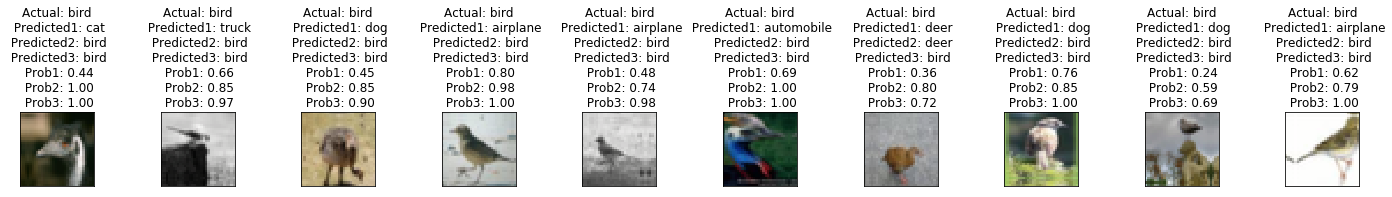


Class: bird-images that are correct at considered softmax but not at last softmax



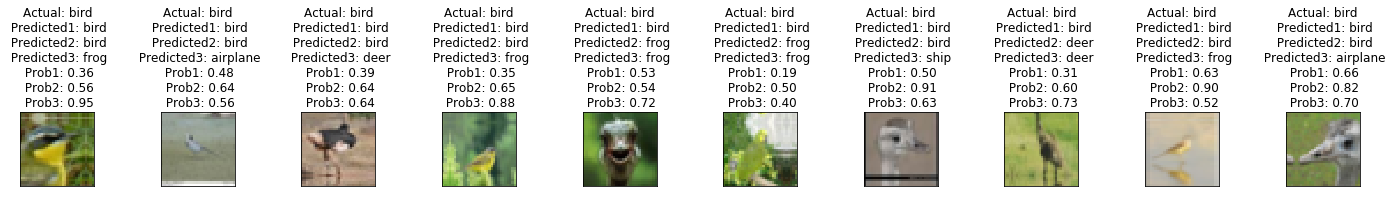


Class: airplane-images that are correct at last softmax but not at considered softmax



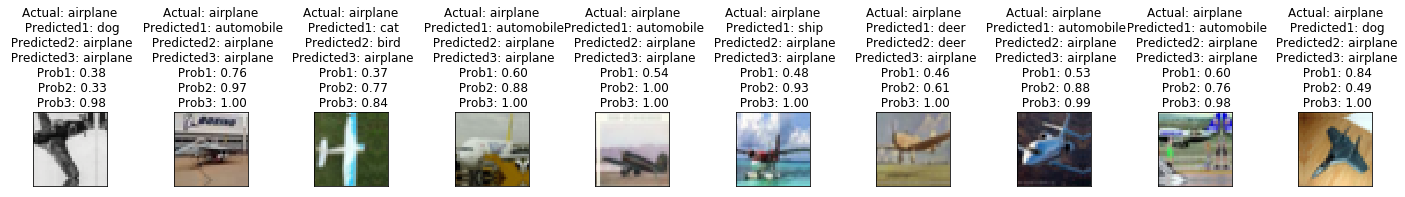


Class: airplane-images that are correct at considered softmax but not at last softmax



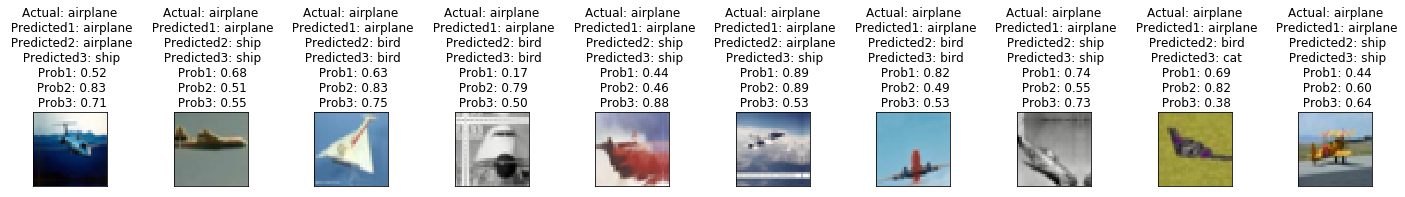


Class: deer-images that are correct at last softmax but not at considered softmax



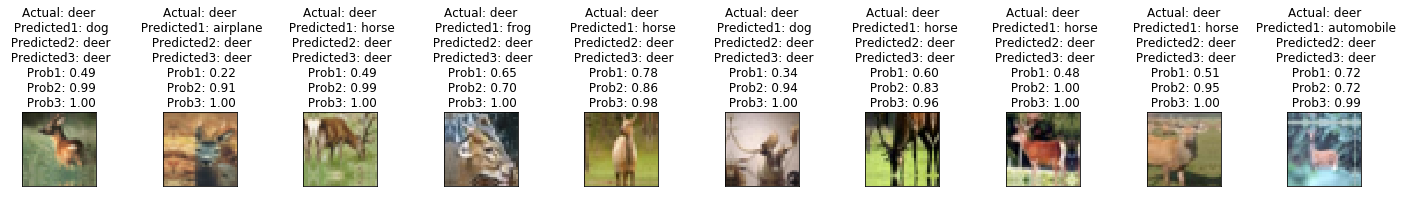


Class: deer-images that are correct at considered softmax but not at last softmax



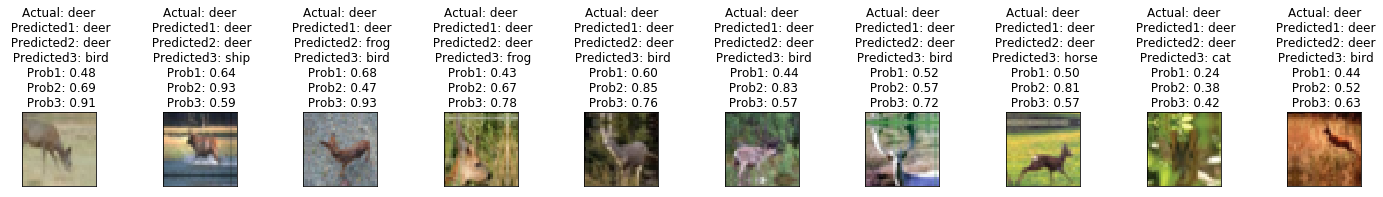


Class: dog-images that are correct at last softmax but not at considered softmax



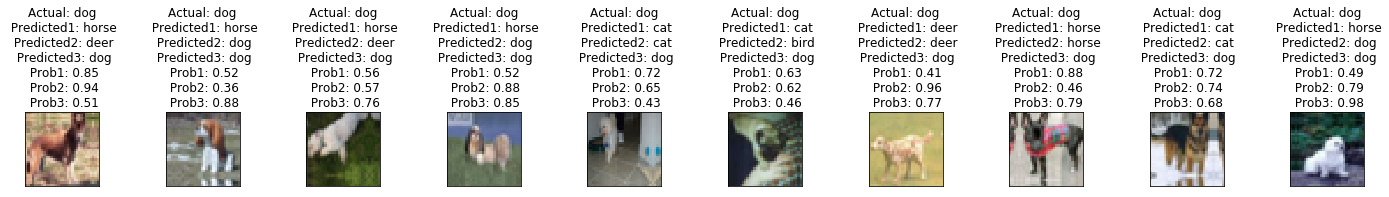


Class: dog-images that are correct at considered softmax but not at last softmax



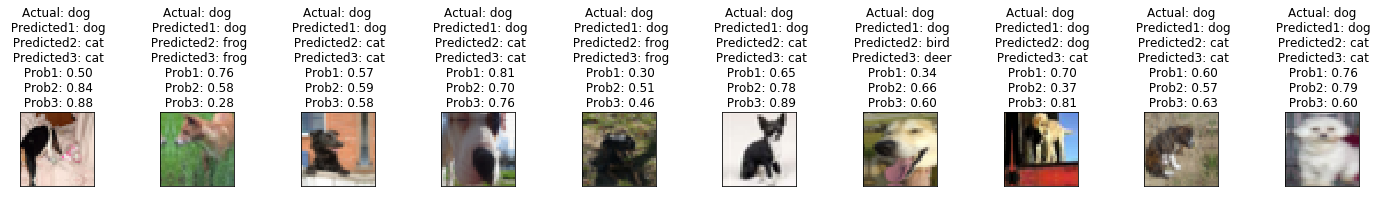


Class: cat-images that are correct at last softmax but not at considered softmax



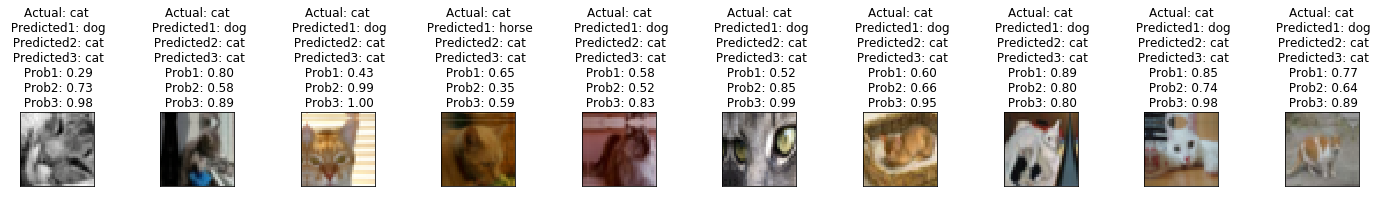


Class: cat-images that are correct at considered softmax but not at last softmax



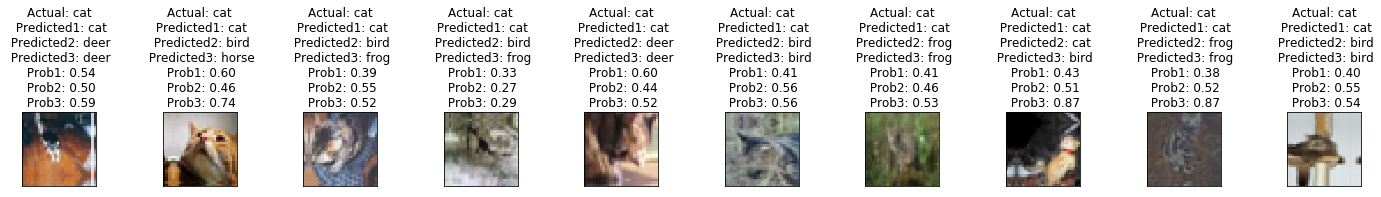


Class: truck-images that are correct at last softmax but not at considered softmax



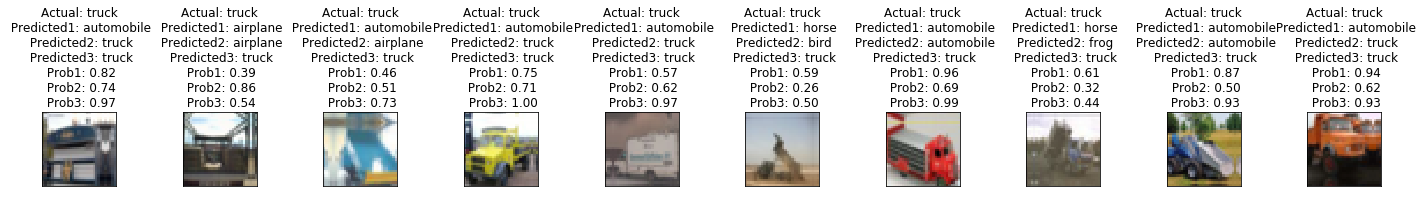


Class: truck-images that are correct at considered softmax but not at last softmax



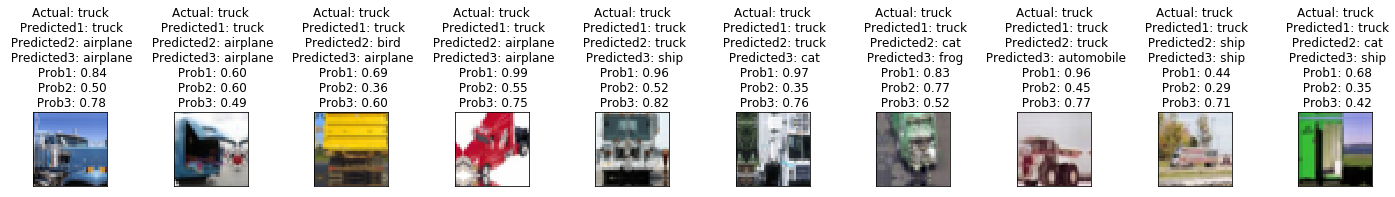


Class: frog-images that are correct at last softmax but not at considered softmax



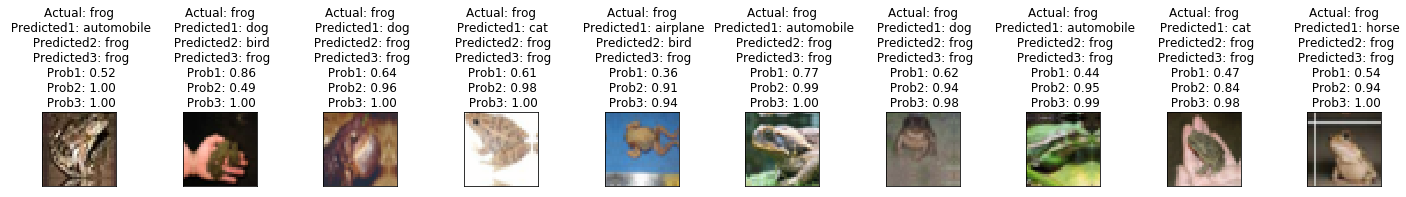


Class: frog-images that are correct at considered softmax but not at last softmax



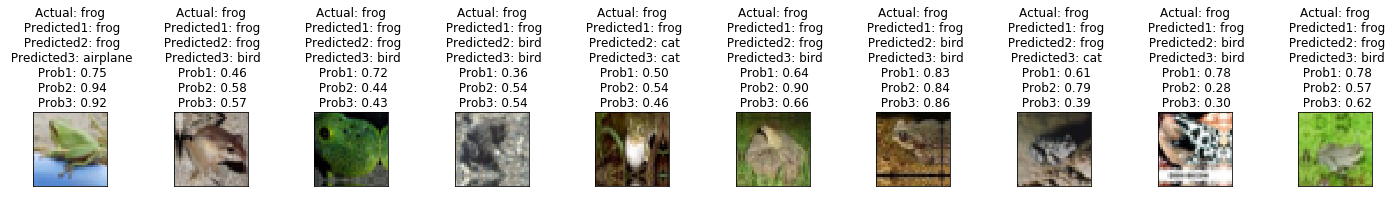


Class: ship-images that are correct at last softmax but not at considered softmax



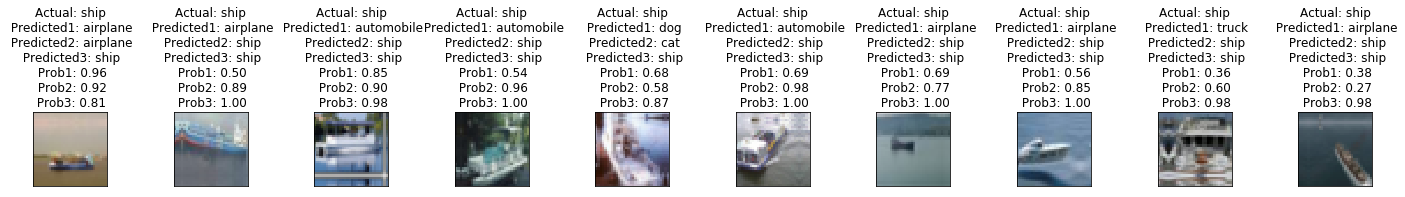


Class: ship-images that are correct at considered softmax but not at last softmax



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


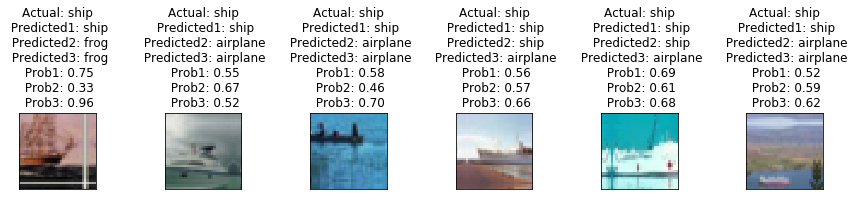


Class: horse-images that are correct at last softmax but not at considered softmax



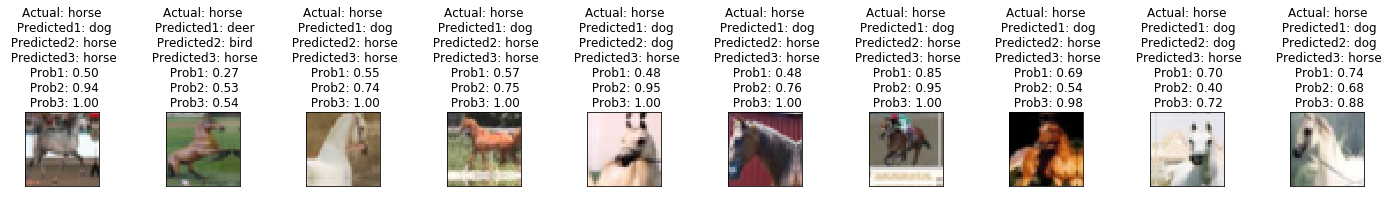


Class: horse-images that are correct at considered softmax but not at last softmax



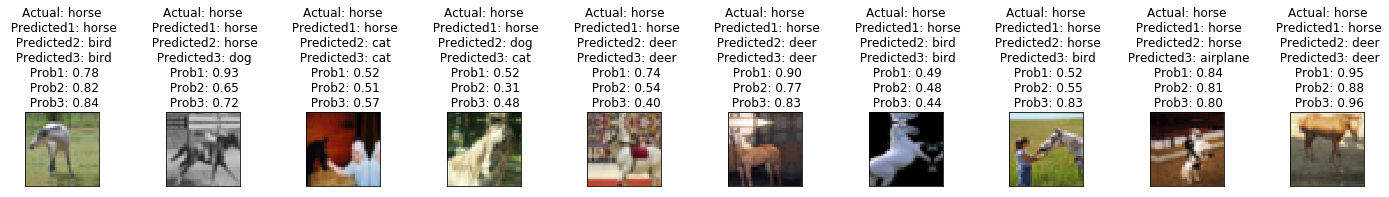


Class: automobile-images that are correct at last softmax but not at considered softmax



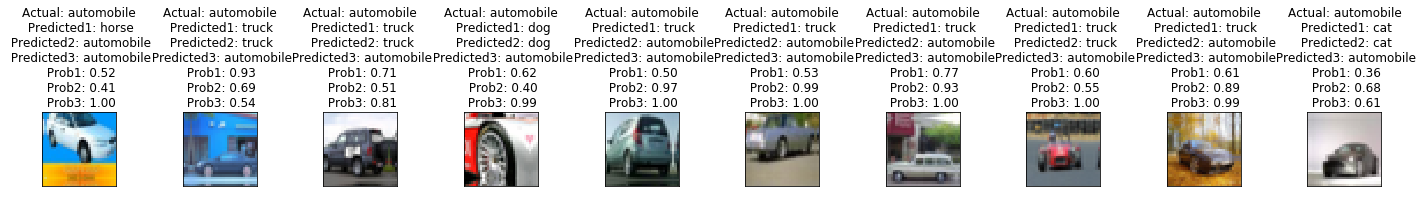


Class: automobile-images that are correct at considered softmax but not at last softmax



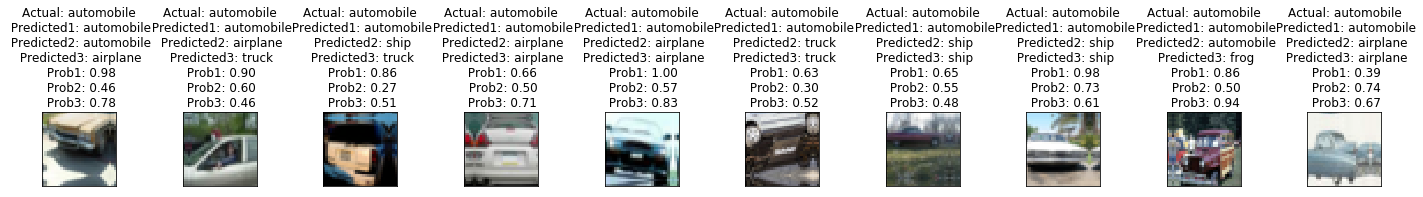

In [23]:
print("last softmax is softmax3, considered softmax is softmax1\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")
visual_utils.plot_diff(diff_df, sm_col="sm1_correct", main_col="sm3_correct",
                       denormalize=True, ncols=10)

# Visualizing Images. Difference b/w softmax2 and softmax3

This set of viz has images with the following property

1. All images where softmax2 is doing incorrectly but softmax3 is correct
2. All images where softmax2 is doing correctly but softmax3 is not



These are plotted one next to other for each class

last softmax is softmax3, considered softmax is softmax2
predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3


Class: dog-images that are correct at last softmax but not at considered softmax



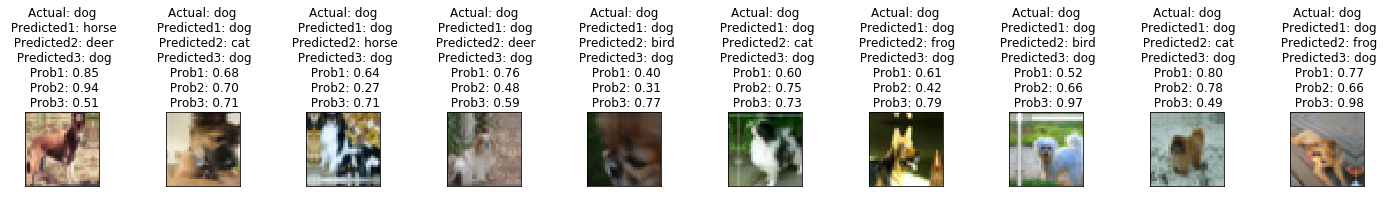


Class: dog-images that are correct at considered softmax but not at last softmax



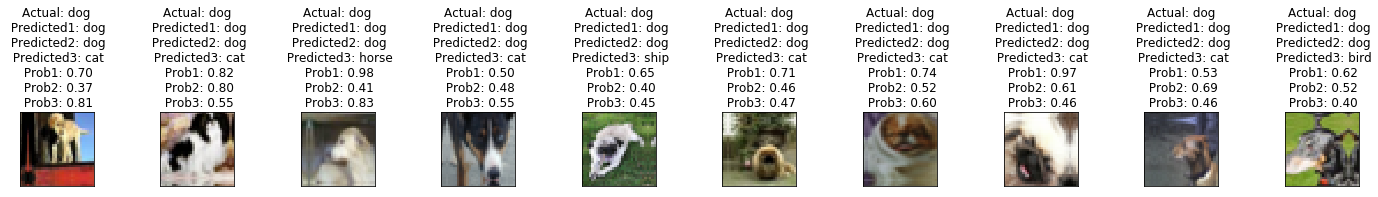


Class: airplane-images that are correct at last softmax but not at considered softmax



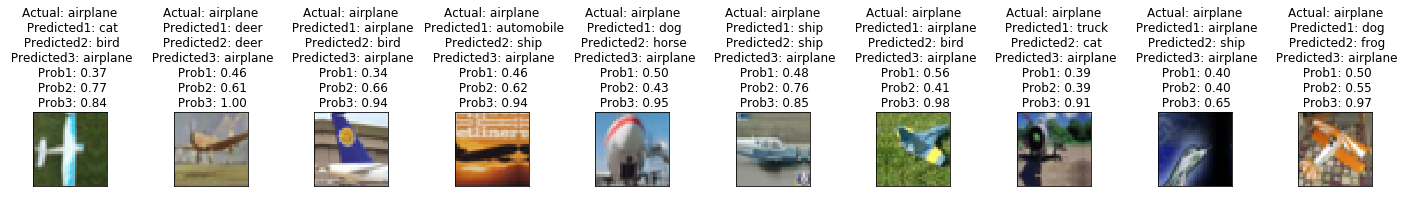


Class: airplane-images that are correct at considered softmax but not at last softmax



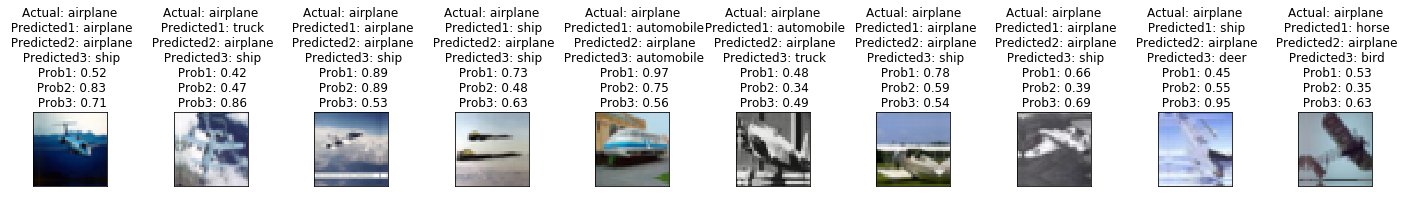


Class: truck-images that are correct at last softmax but not at considered softmax



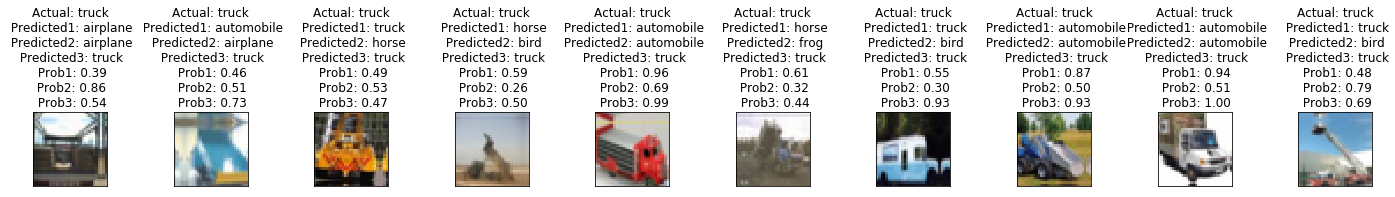


Class: truck-images that are correct at considered softmax but not at last softmax



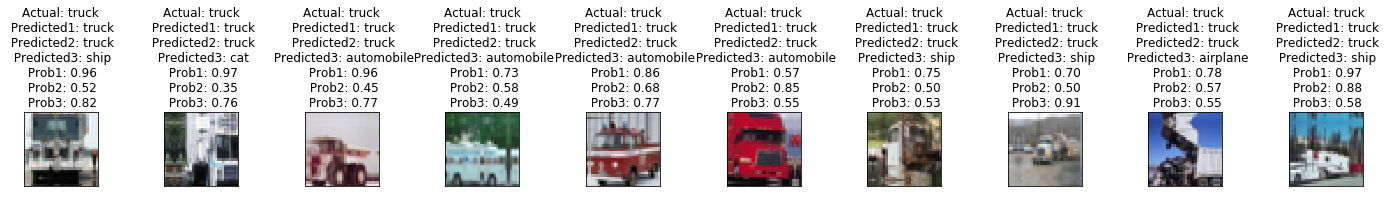


Class: ship-images that are correct at last softmax but not at considered softmax



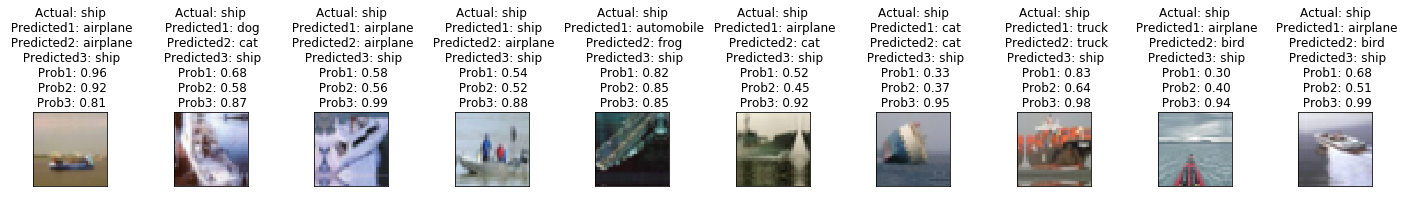


Class: ship-images that are correct at considered softmax but not at last softmax



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


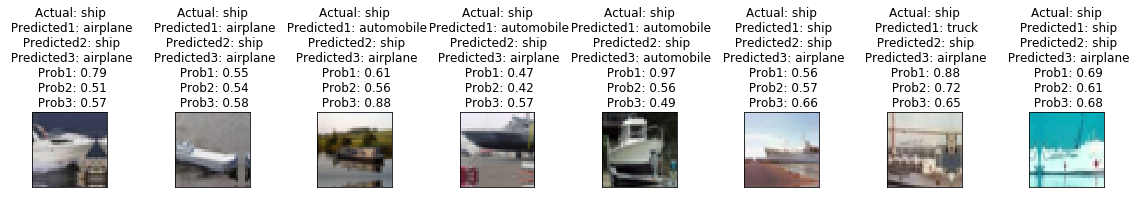


Class: frog-images that are correct at last softmax but not at considered softmax



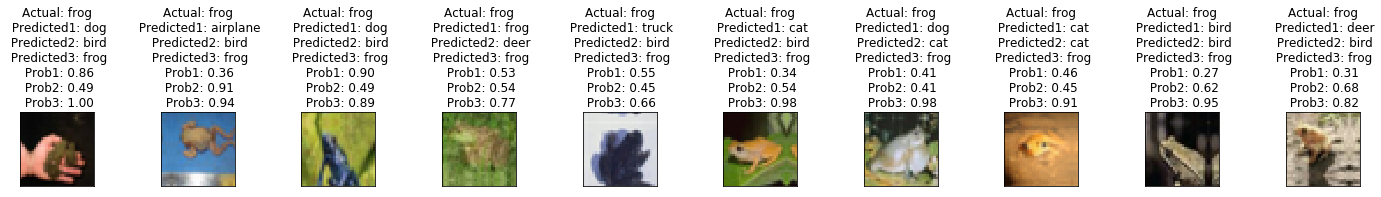


Class: frog-images that are correct at considered softmax but not at last softmax



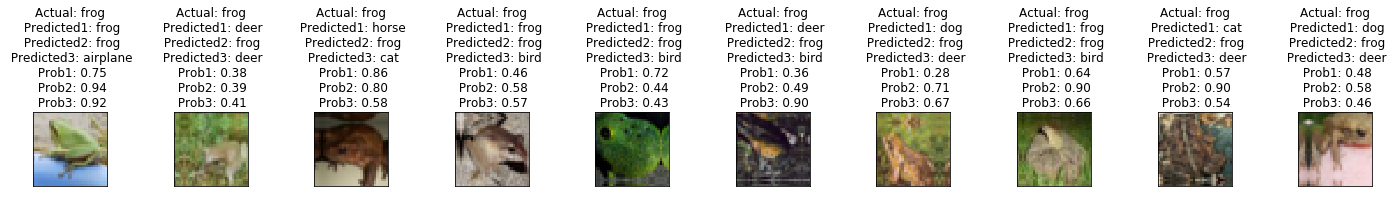


Class: bird-images that are correct at last softmax but not at considered softmax



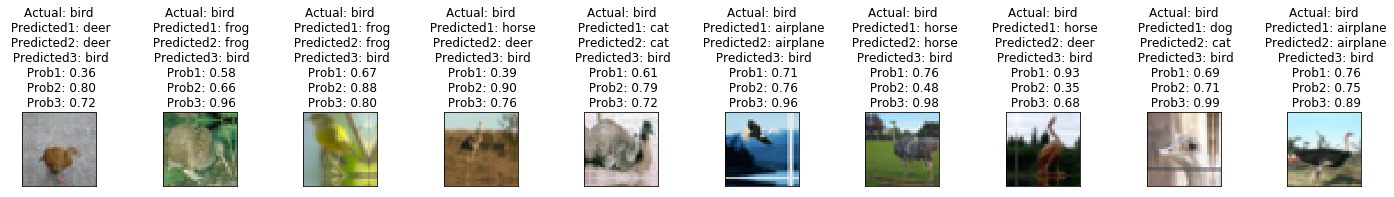


Class: bird-images that are correct at considered softmax but not at last softmax



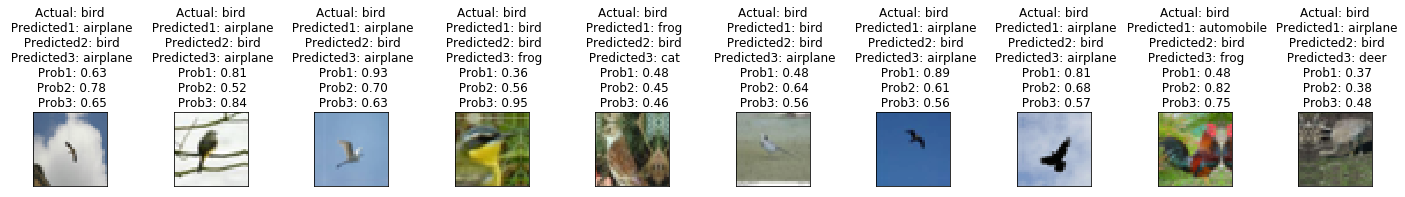


Class: horse-images that are correct at last softmax but not at considered softmax



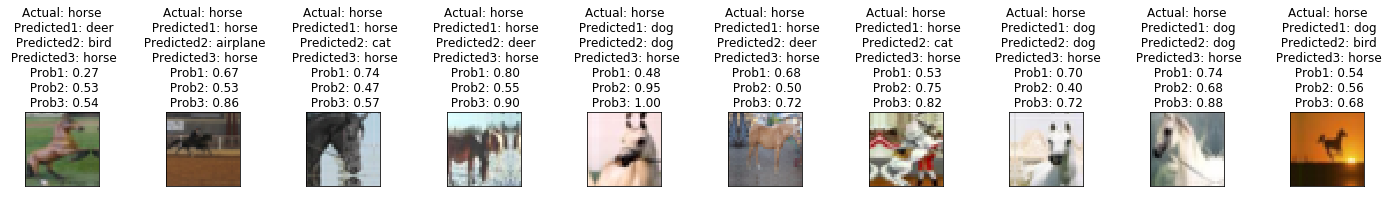


Class: horse-images that are correct at considered softmax but not at last softmax



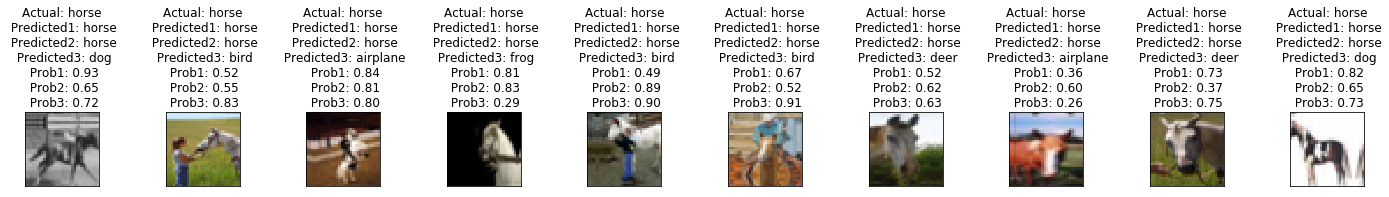


Class: deer-images that are correct at last softmax but not at considered softmax



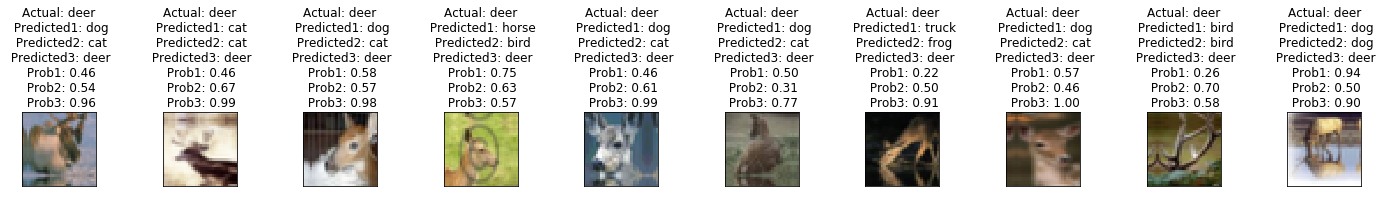


Class: deer-images that are correct at considered softmax but not at last softmax



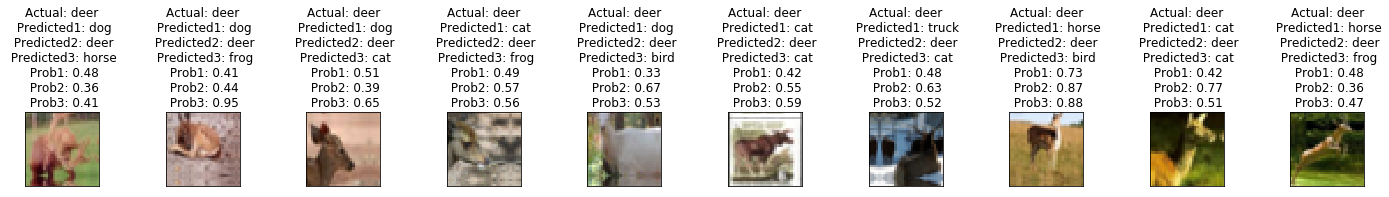


Class: automobile-images that are correct at last softmax but not at considered softmax



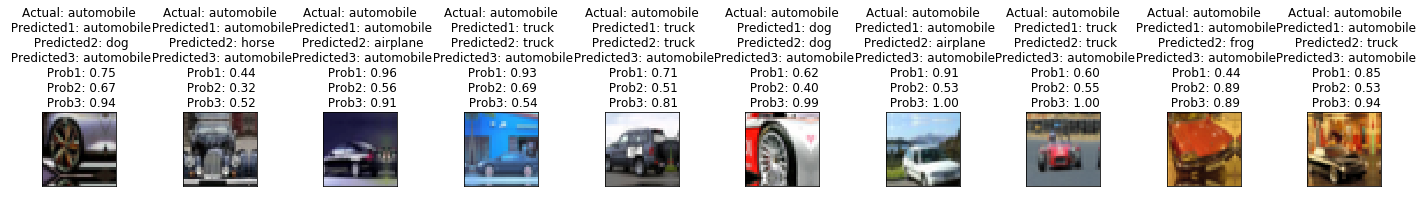


Class: automobile-images that are correct at considered softmax but not at last softmax



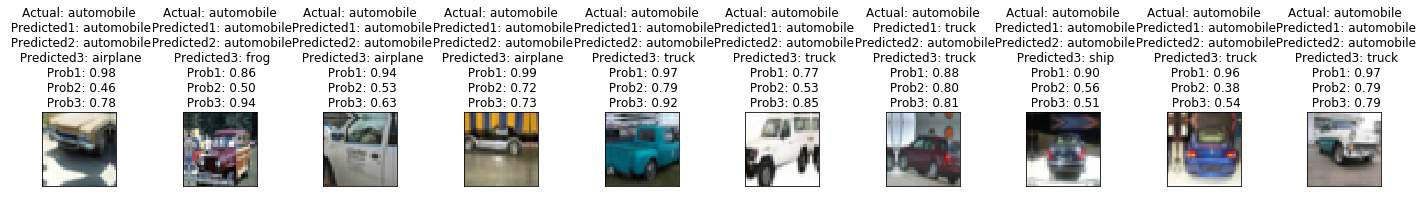


Class: cat-images that are correct at last softmax but not at considered softmax



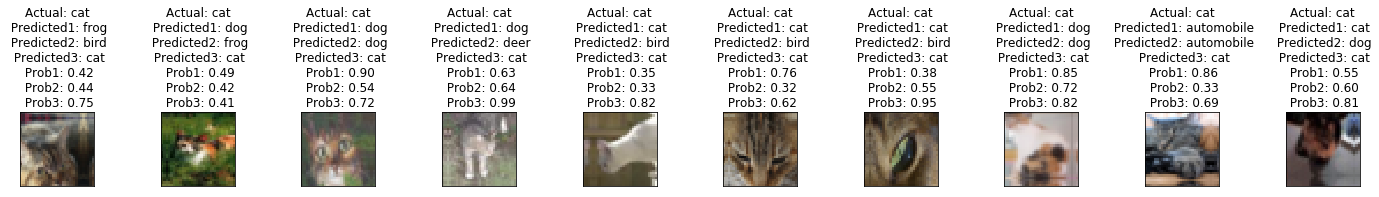


Class: cat-images that are correct at considered softmax but not at last softmax



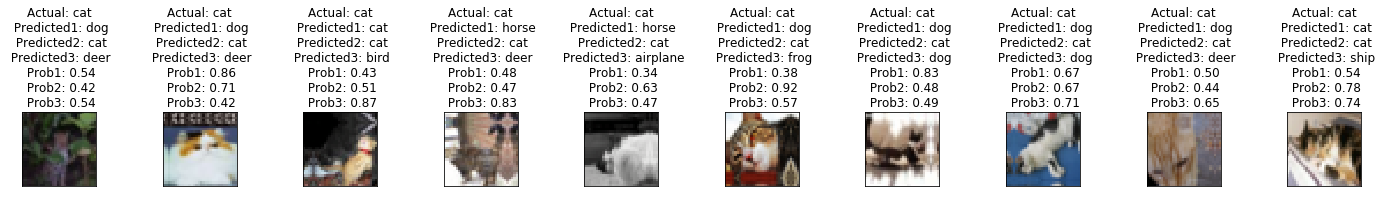

In [24]:
print("last softmax is softmax3, considered softmax is softmax2\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_diff(diff_df,
                       sm_col="sm2_correct", main_col="sm3_correct",
                       img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True)

<a name=viz_good_bad></a>

# Good and Worse Predictions
In this set of viz, images have following properties

1. For a given softmax, predictions that are both correct and have high probability(Highly confident correct predictions)

2. For a given softmax, predictions that are highly confident but for a wrong class.

These are plotted row by for each class

In [19]:
!git pull
reload(visual_utils)

Already up to date.


<module 'visual_utils' from '/content/gdrive/My Drive/Colab Notebooks/eva_research_team4/src/visual_utils.py'>

**Softmax1- Good and worse predictions**

(1985, 13) (2000, 13)

Class: truck-Correct with high confidence



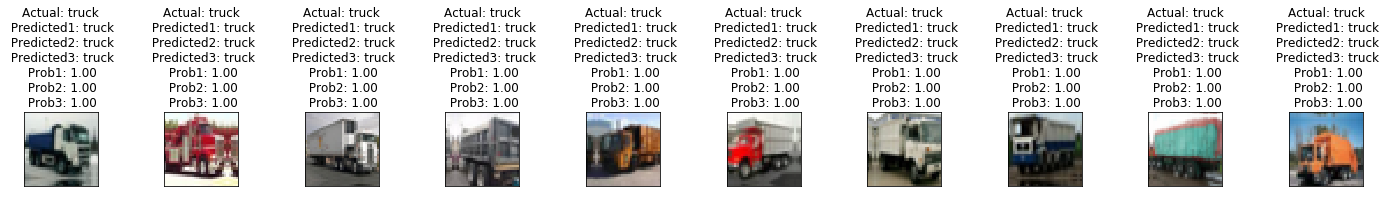


Class: truck-Incorrect with high confidence



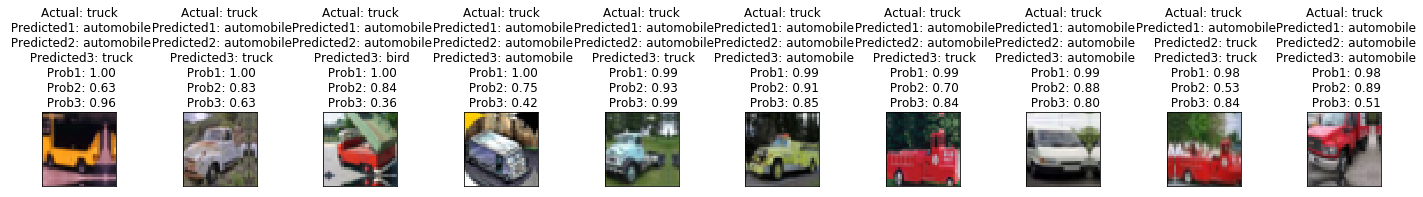


Class: ship-Correct with high confidence



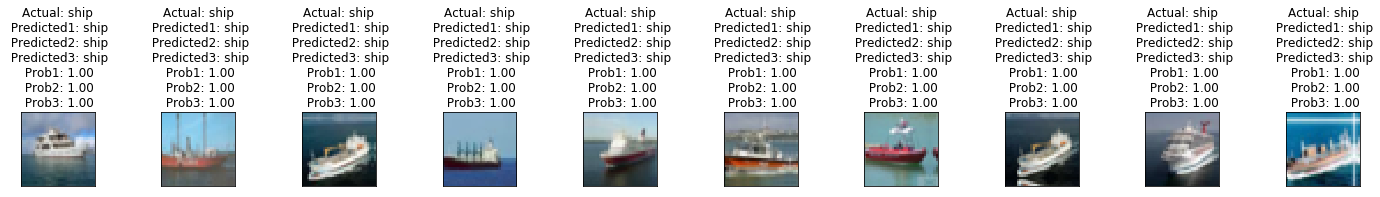


Class: ship-Incorrect with high confidence



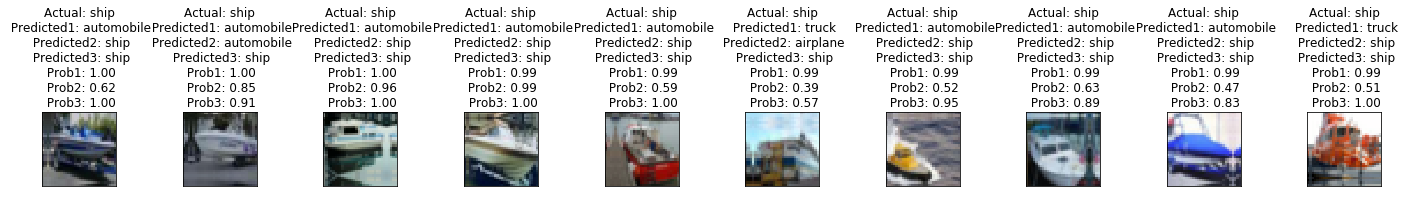


Class: horse-Correct with high confidence



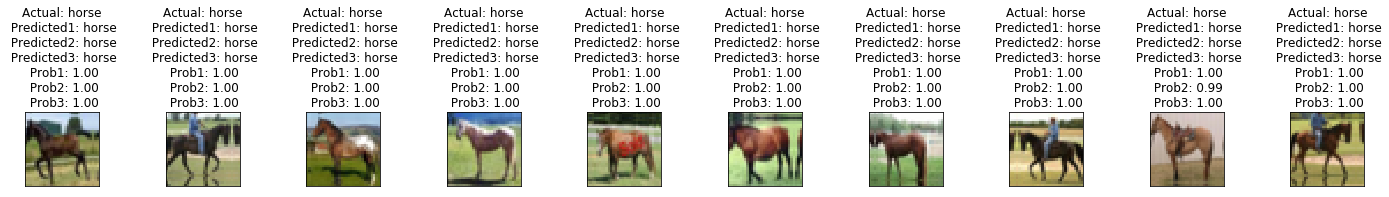


Class: horse-Incorrect with high confidence



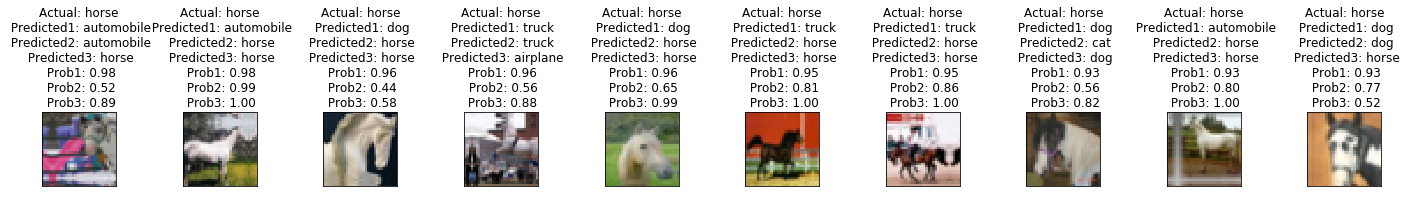


Class: frog-Correct with high confidence



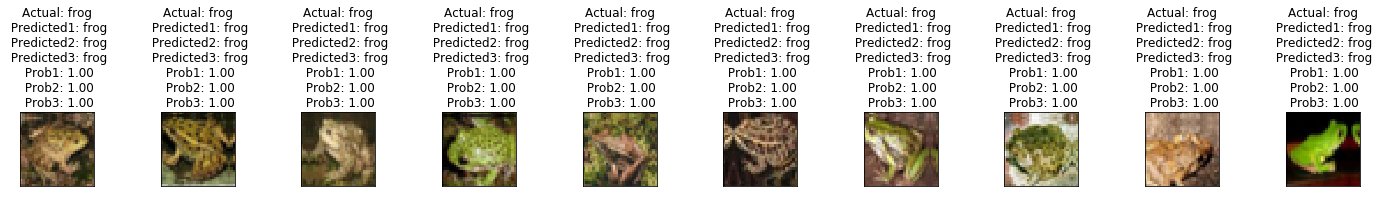


Class: frog-Incorrect with high confidence



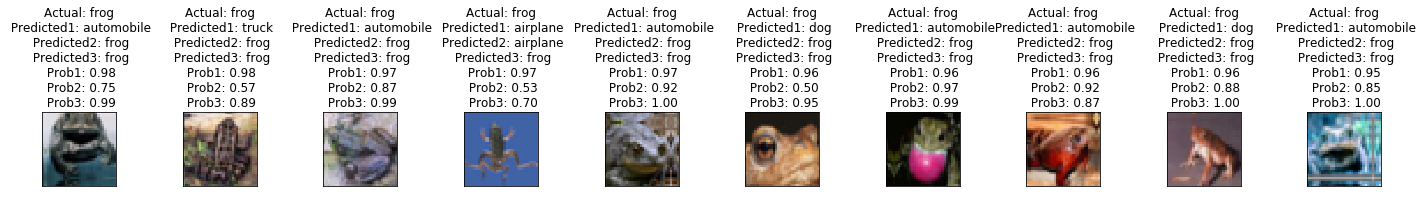


Class: dog-Correct with high confidence



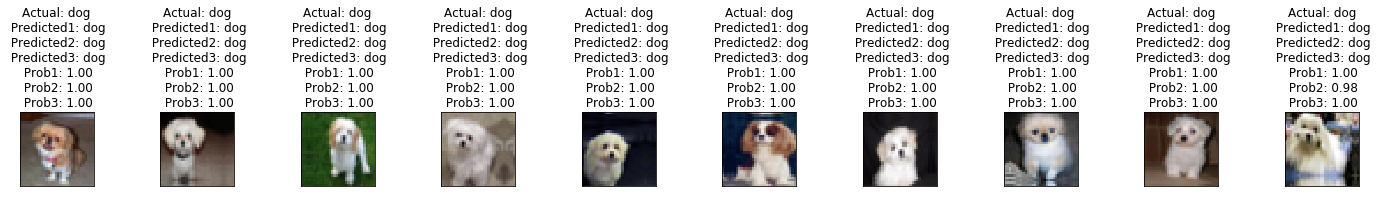


Class: dog-Incorrect with high confidence



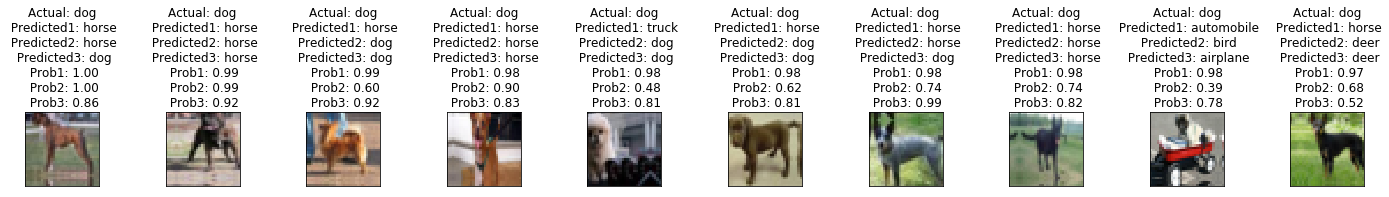


Class: deer-Correct with high confidence



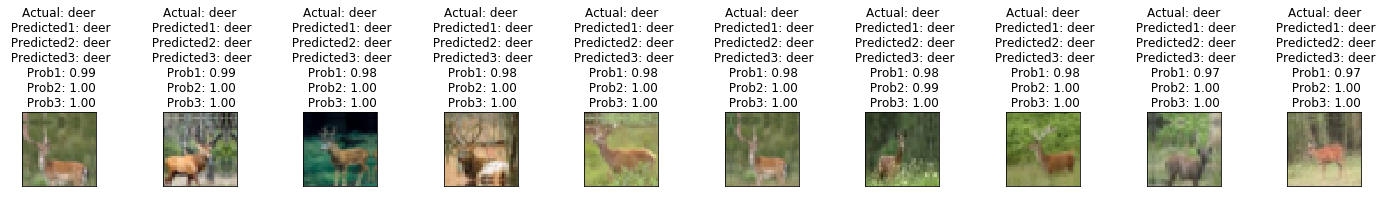


Class: deer-Incorrect with high confidence



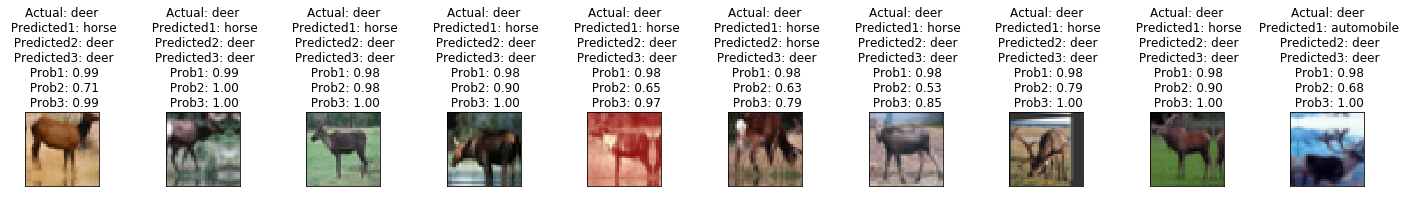


Class: cat-Correct with high confidence



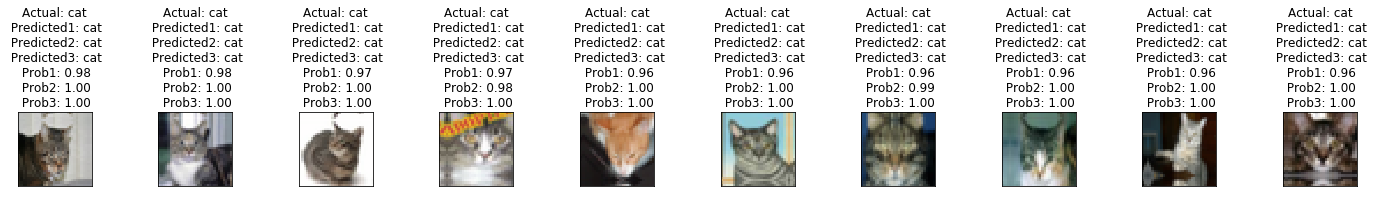


Class: cat-Incorrect with high confidence



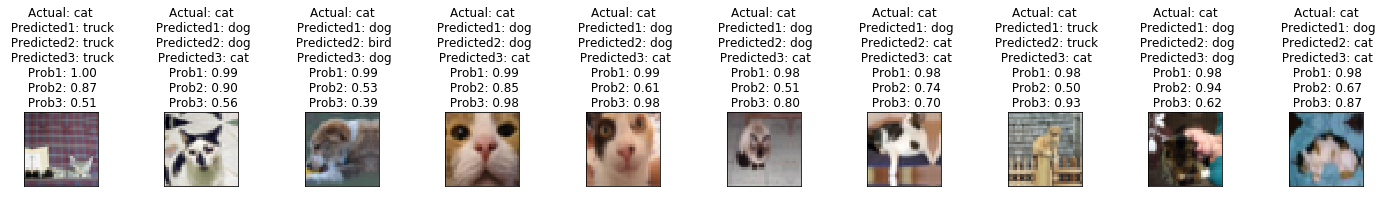


Class: bird-Correct with high confidence



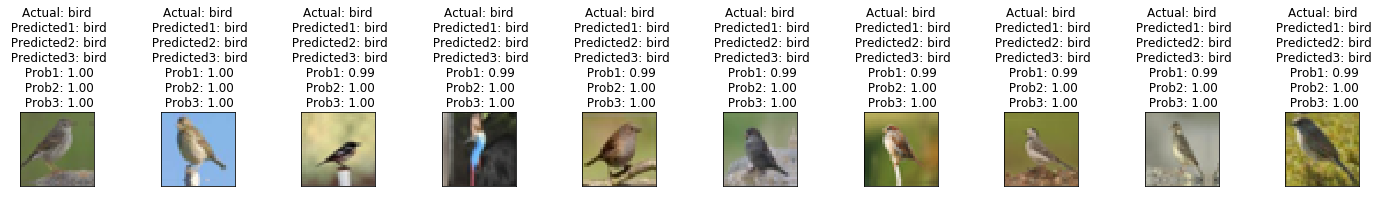


Class: bird-Incorrect with high confidence



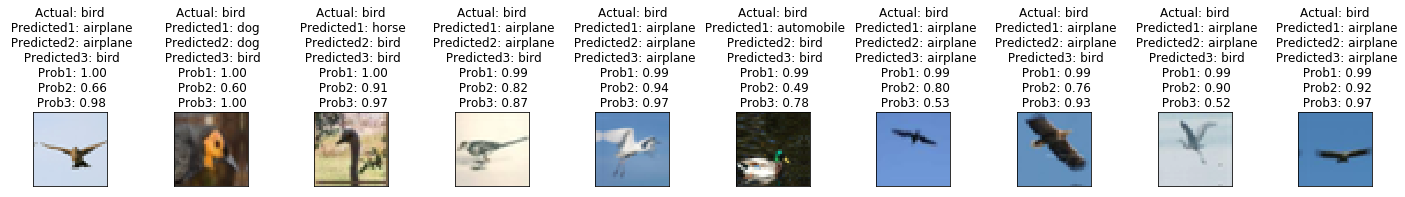


Class: automobile-Correct with high confidence



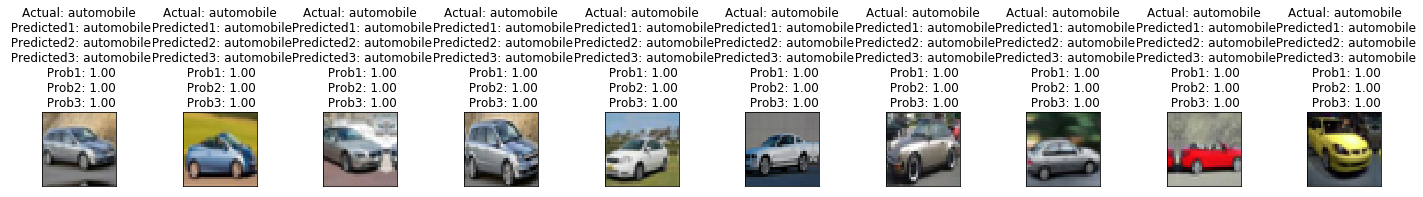


Class: automobile-Incorrect with high confidence



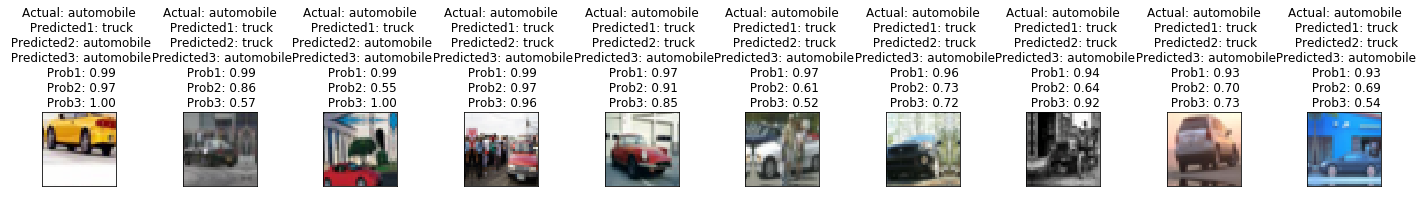


Class: airplane-Correct with high confidence



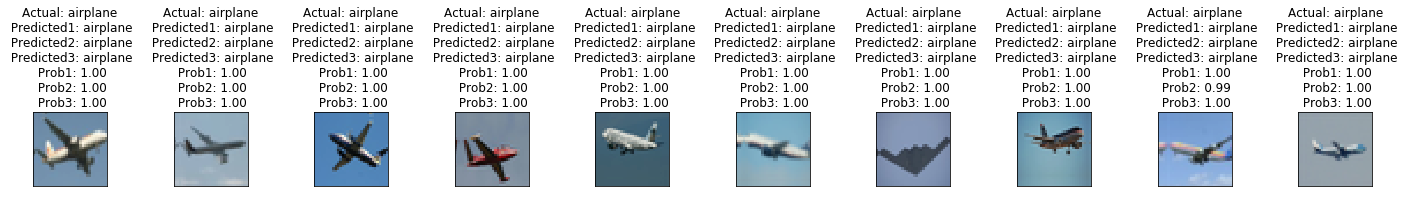


Class: airplane-Incorrect with high confidence



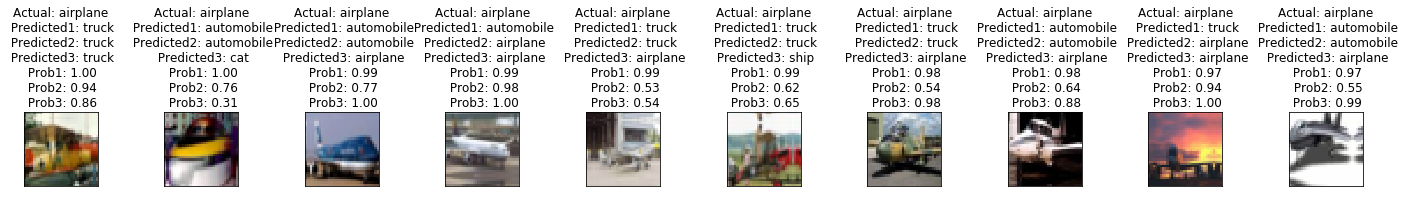

In [25]:
visual_utils.plot_good_and_worst(df=all_df, sm_col="sm1_correct", sm_class="sm1_class", sm_prob="sm1_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax1**

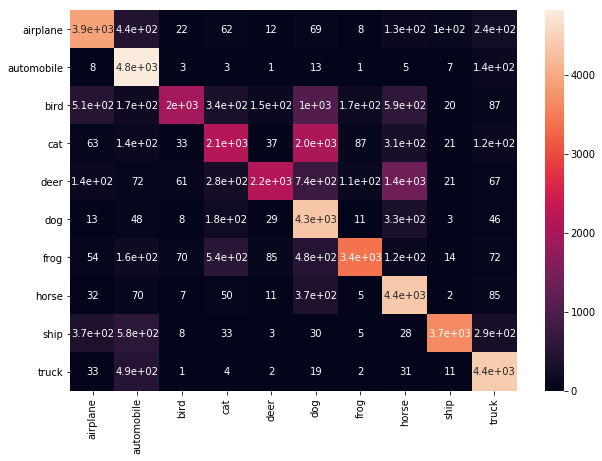

In [26]:
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

**Softmax2- Good and worse predictions**

predicted1 and prob1-softmax1
predicted2 and prob2-softmax2
predicted3 and prob3-softmax3

(2000, 13) (2000, 13)

Class: truck-Correct with high confidence



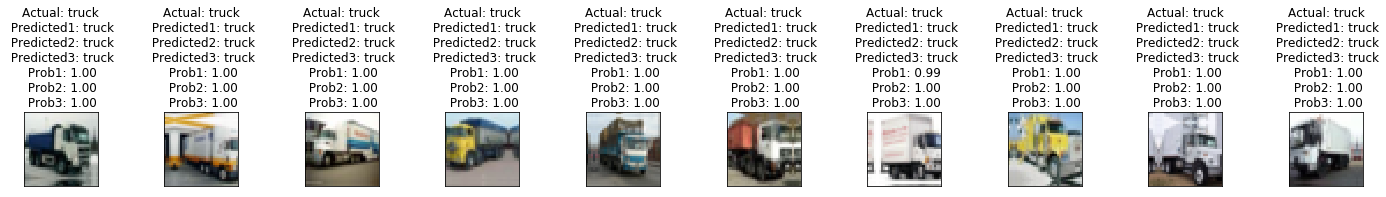


Class: truck-Incorrect with high confidence



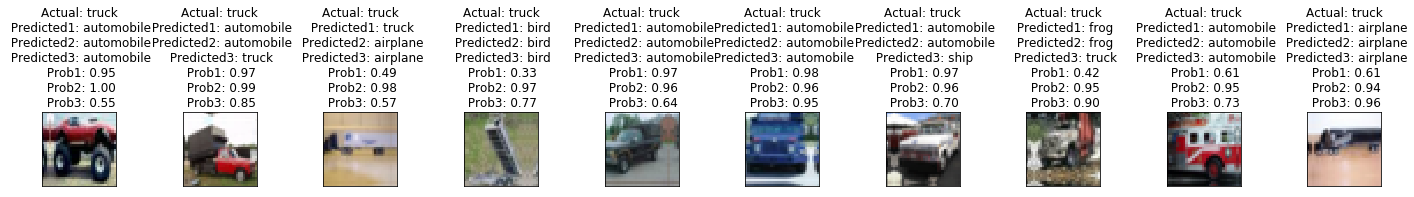


Class: ship-Correct with high confidence



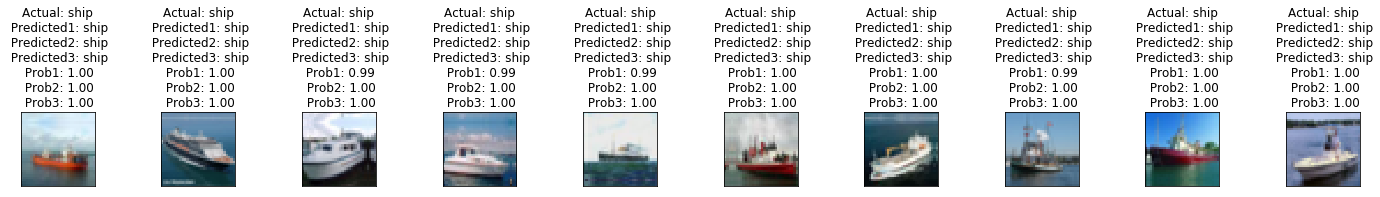


Class: ship-Incorrect with high confidence



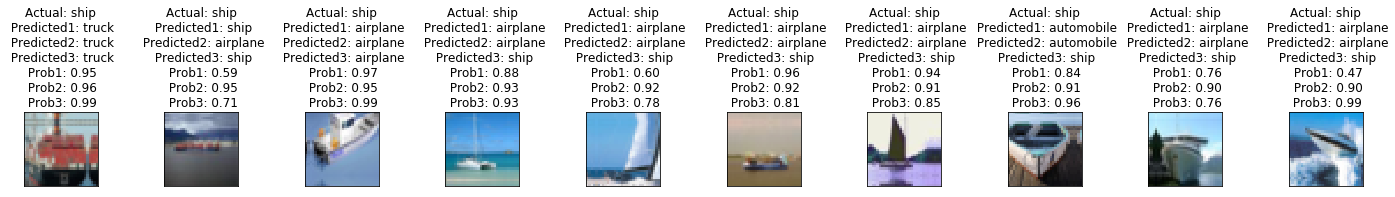


Class: horse-Correct with high confidence



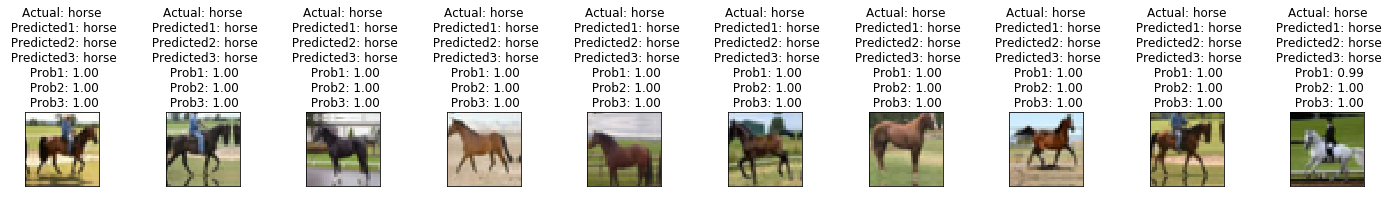


Class: horse-Incorrect with high confidence



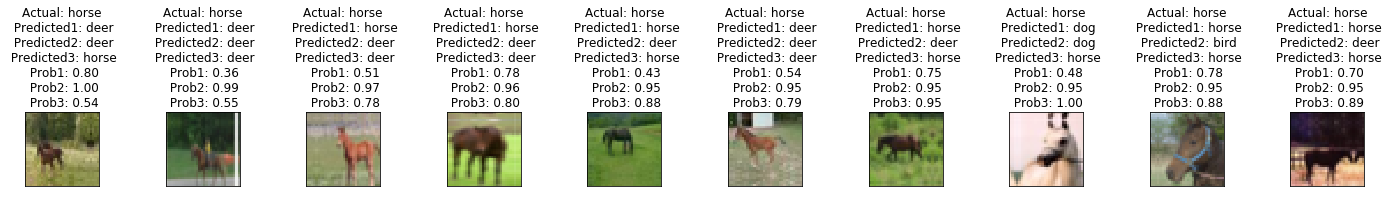


Class: frog-Correct with high confidence



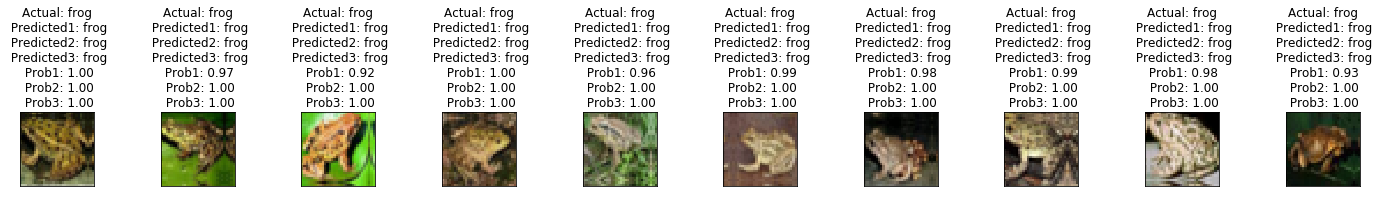


Class: frog-Incorrect with high confidence



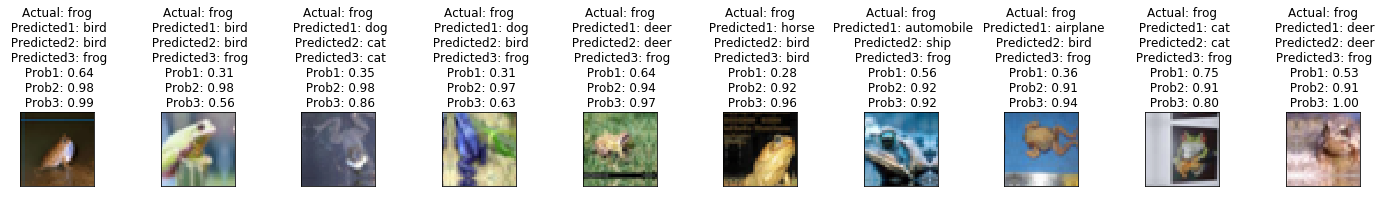


Class: dog-Correct with high confidence



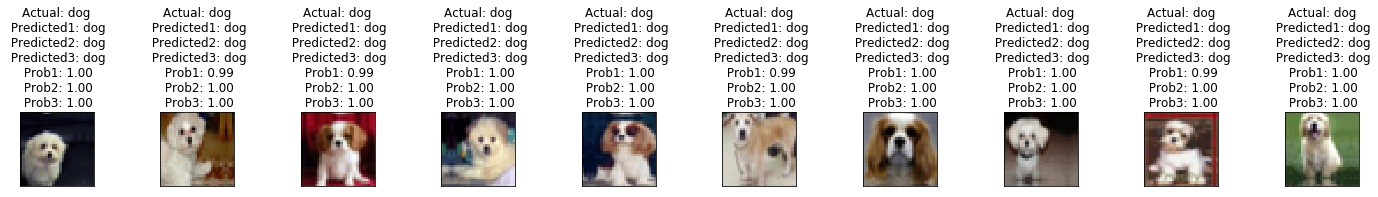


Class: dog-Incorrect with high confidence



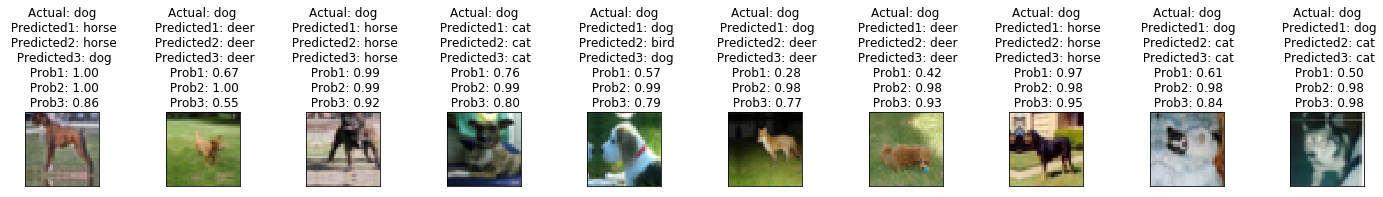


Class: deer-Correct with high confidence



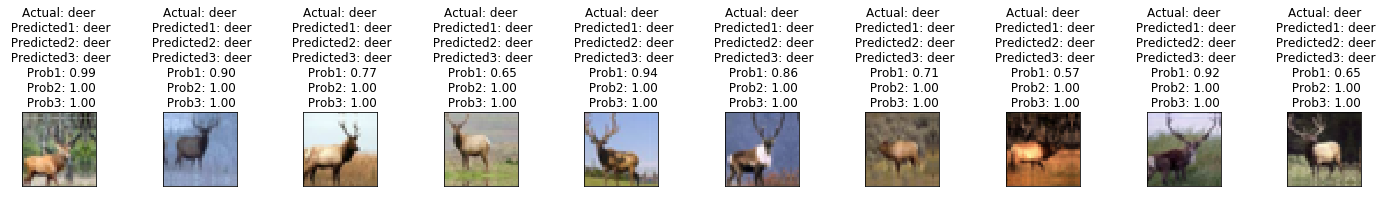


Class: deer-Incorrect with high confidence



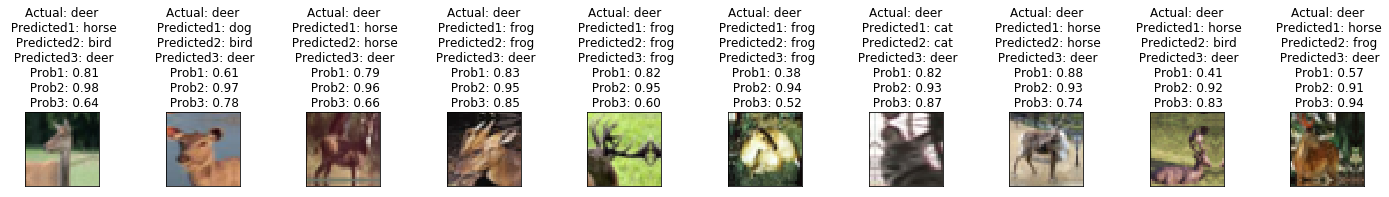


Class: cat-Correct with high confidence



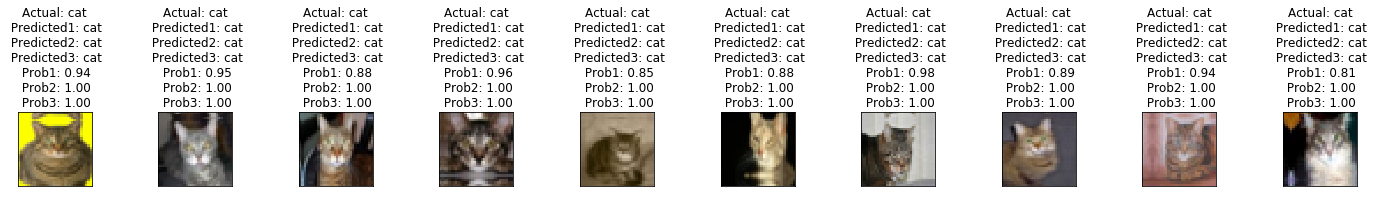


Class: cat-Incorrect with high confidence



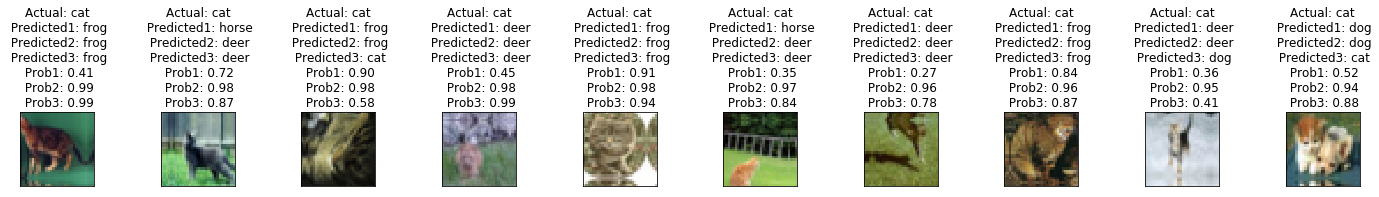


Class: bird-Correct with high confidence



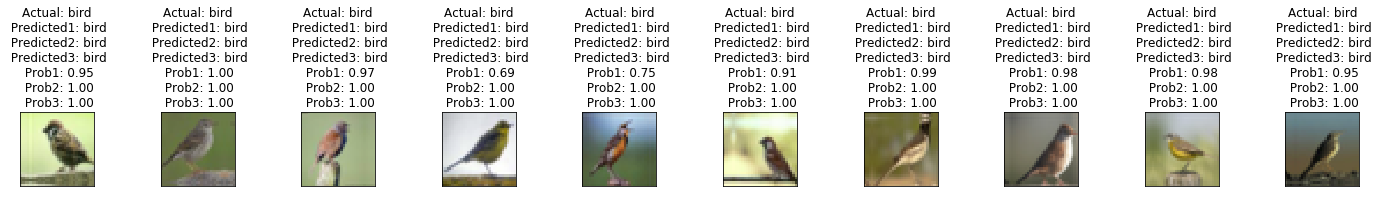


Class: bird-Incorrect with high confidence



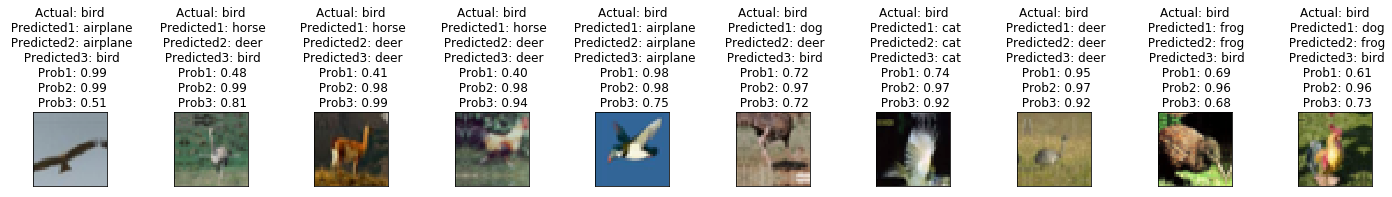


Class: automobile-Correct with high confidence



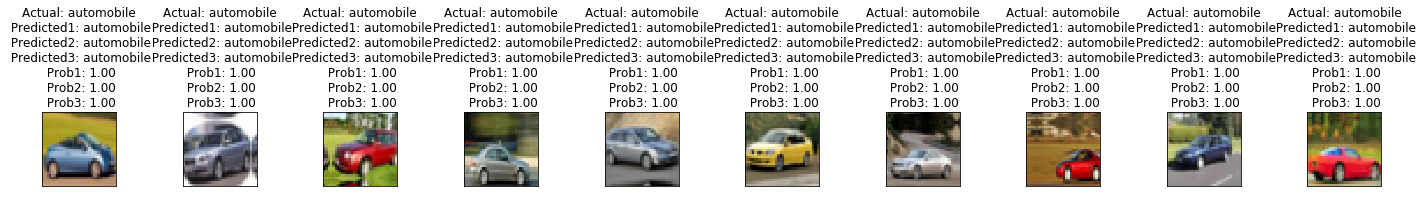


Class: automobile-Incorrect with high confidence



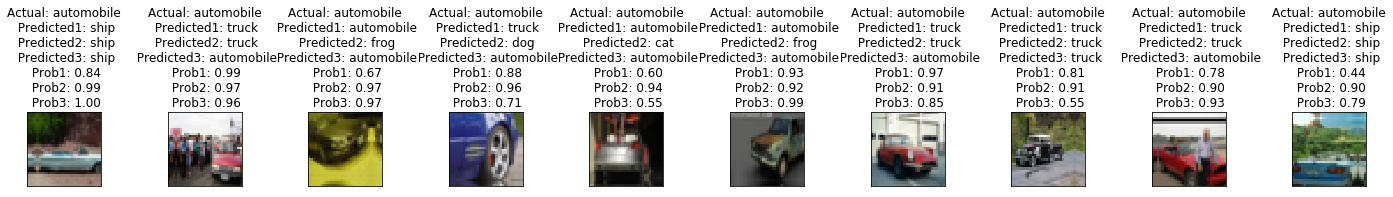


Class: airplane-Correct with high confidence



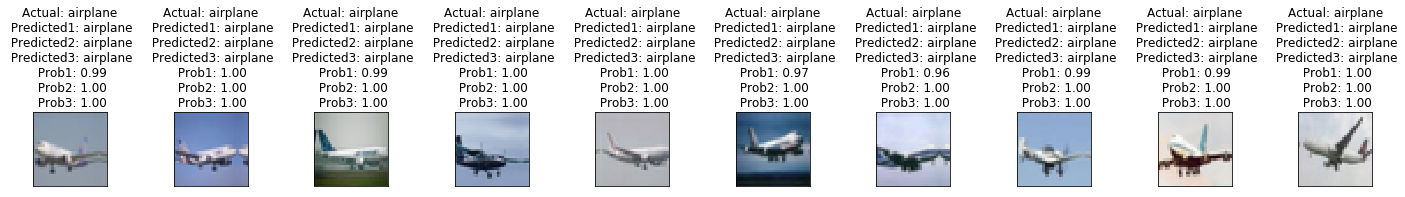


Class: airplane-Incorrect with high confidence



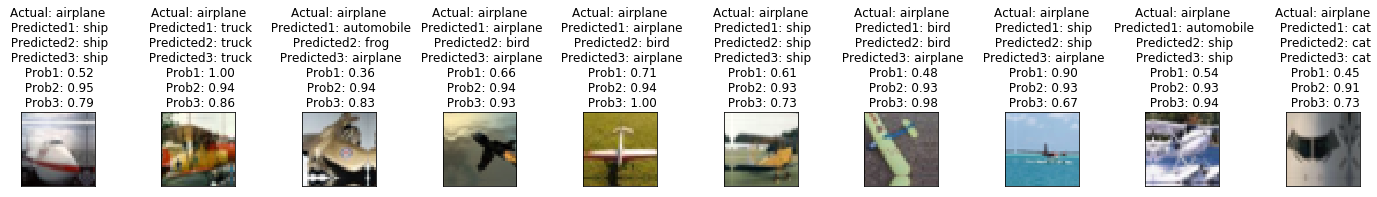

In [27]:
print("\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_good_and_worst(df=all_df, sm_col="sm2_correct", sm_class="sm2_class", sm_prob="sm2_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax2**

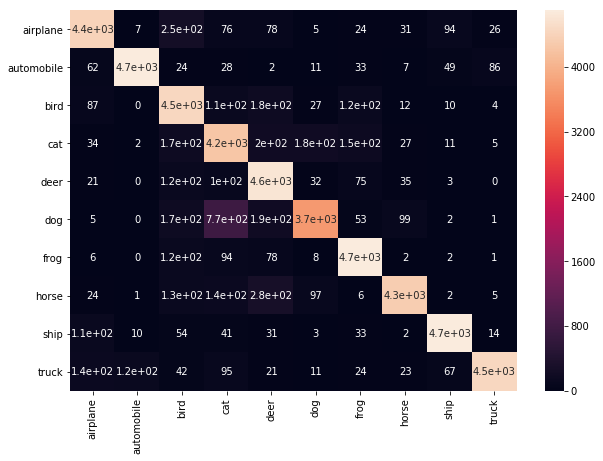

In [28]:
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

# Logs

In [38]:
import pandas as pd

pd.read_csv("../data/run_logger.csv").tail()

total_model_parameters  ...                                           comments
121                 7850432  ...                          Zeedense 7M without roots
122                  570448  ...  Zeedensenet multisoftmax, gap on channels, mul...
123                  570448  ...  Zeedensenet multisoftmax, gap on channels, mul...
124                  570448  ...  Zeedensenet multisoftmax, gap on channels, mul...
125                  570448  ...  Zeedensenet multisoftmax, gap on channels, mul...

[5 rows x 17 columns]